Name: Mohammed Usamah     


Roll number: BAIM-S20-002

.

## Importing Libraries

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Loading and Preparing data

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1



Checking for missing Data



In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Checking for Correlation

In [8]:
corr_matrix = data.corr()

/tmp/ipykernel_46507/962194556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [9]:
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Rmoving the unrequired data

In [10]:
remove = ['compressionratio','symboling','peakrpm','car_ID','citympg','highwaympg']

In [11]:
new_data = data.drop(remove,axis="columns")

In [12]:
new_data.head(10)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,111,13495.000
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,111,16500.000
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,154,16500.000
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,102,13950.000
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,115,17450.000
5,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,110,15250.000
6,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,110,17710.000
7,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,110,18920.000
8,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,140,23875.000
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,160,17859.167


Spliting the data

In [13]:
new_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [14]:
new_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [15]:
new_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [16]:
new_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [17]:
new_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [18]:
new_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [19]:
new_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [20]:
new_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [21]:
new_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [22]:
new_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [23]:
catagorical = ['fuelsystem','cylindernumber','enginetype','carbody','CarName']
val = ['drivewheel','enginelocation','doornumber','fueltype','aspiration']
New_data = new_data.drop('price',axis='columns')

In [24]:
Column_Transformer = ColumnTransformer(transformers=[
    ("Car", OneHotEncoder(), catagorical),
    ('Val', OrdinalEncoder(),val)
],remainder='passthrough')


In [25]:
New_data_prepared =Column_Transformer.fit_transform(New_data)

In [26]:
Roll_number = 2

def Test_Size(roll_number):
    if roll_number>=10:
        Test_size = roll_number/100
    elif roll_number>=5:
        Test_size = roll_number*2/100
    else:
        Test_size = roll_number*5/100
    return Test_size

In [27]:
X_train, X_test,Y_train,Y_test = train_test_split(New_data_prepared,
                                                  new_data['price'],test_size=Test_Size(Roll_number))

In [28]:
X_train

<184x188 sparse matrix of type '<class 'numpy.float64'>'
	with 3029 stored elements in Compressed Sparse Row format>

In [29]:
Y_train

76      5389.0
132    11850.0
166     9538.0
153     6918.0
48     35550.0
        ...   
123     8921.0
43      6785.0
141     7126.0
174    10698.0
103    13499.0
Name: price, Length: 184, dtype: float64

In [30]:
X_test

<21x188 sparse matrix of type '<class 'numpy.float64'>'
	with 352 stored elements in Compressed Sparse Row format>

In [31]:
Y_test

167     8449.0
72     35056.0
42     10345.0
62     10245.0
18      5151.0
87      9279.0
171    11549.0
93      7349.0
83     14869.0
110    13860.0
4      17450.0
152     6488.0
46     11048.0
191    13295.0
23      7957.0
125    22018.0
45      8916.5
49     36000.0
151     6338.0
105    19699.0
163     8058.0
Name: price, dtype: float64

## Now Applying the Model

In [32]:
lin_reg = LinearRegression()
test = lin_reg.fit(X_train,Y_train)

In [47]:
mse=cross_val_score(lin_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10)

In [50]:
mse

array([-11652115.29472089, -33509450.88442485, -28237881.84598226,
       -22609804.3557728 , -24886623.72039573, -10894321.38242064,
        -3261220.75130451, -30251214.76831128, -18418797.71814758,
       -17071931.63069848])

In [49]:
np.mean(mse)

-20079336.235217903

In [33]:
test.score(X_train,Y_train)

0.9955524475745826

In [34]:
test.score(X_test,Y_test)

0.8282545820043519

In [39]:
reg_pred = lin_reg.predict(X_test)

In [36]:
list(Y_test)

[8449.0,
 35056.0,
 10345.0,
 10245.0,
 5151.0,
 9279.0,
 11549.0,
 7349.0,
 14869.0,
 13860.0,
 17450.0,
 6488.0,
 11048.0,
 13295.0,
 7957.0,
 22018.0,
 8916.5,
 36000.0,
 6338.0,
 19699.0,
 8058.0]

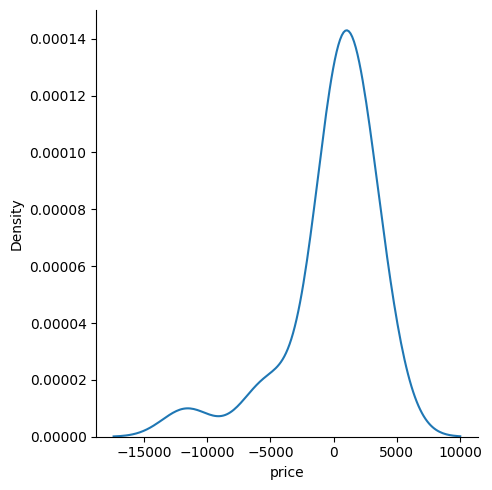

In [40]:
sns.displot(reg_pred-Y_test,kind='kde')


In [43]:
score=r2_score(reg_pred,Y_test)

In [44]:
score

0.8632755393840629